In [53]:
#Dependencies
from citipy import citipy
from config import openweatherkey
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import math

In [54]:
randCity = []
randCountry = []
loopcnt = 0

#Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
while len(randCity) < 501 :
    # Loop counter to track number of loops made
    #print("Longitud: ", len(randCity))
    loopcnt +=1
    
    # Randomly generate latitude
    lat_pos  = random.randint(0,2)
    base_lat = random.randint(0,91)
    dec_lat  = random.random()/100
    lat      = base_lat + dec_lat
    if lat_pos == 1:
        lat = lat * -1
    
    # Randomly generate longitude
    lng_pos = random.randint(0,2)
    base_lng = random.randint(0,181)
    dec_lng = random.random()/100
    lng = base_lng + dec_lng
    if lng_pos == 1:
        lng = lng * -1
    
    # Call citipy file to get nearest city based on random lat and lng
#    lat = math.acos(random.random() * 2 - 1)
#    print(f"The lattitude is: {lat}") 
#    lng = random.random() * math.pi * 2
#    print(f"The longitude is: {lng}")
    city = citipy.nearest_city(lat, lng)
#    print("Ciudad",city)

    foundCity = False
    for j in range(len(randCity)):
        if city.city_name == randCity[j]:
            foundCity = True
    if foundCity==False  :   
        randCity.append(city.city_name)
        randCountry.append(city.country_code)
print("Longitud: ", len(randCity))

Longitud:  501


In [55]:
# Build query Url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = openweatherkey
units = "imperial"

query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="

In [56]:
# Perform a weather check on each of the cities using a series of successive API calls.
# Include a print log of each city as it's being processed with the city number and city name.
search_data = []
cityList = []
countryList = []

searchCnt = 0
print("Log of each city as it's being processed with the city number and city name")
print(" ")
for city in randCity:
    searchCnt += 1
    print(f"{searchCnt} - city: {city}")   
    response = requests.get(query_url + city).json()
    print(f"URL: {query_url} {city}")
    searchCityID = response.get("id")
    if response.get("id"):
        print(f"Response Ok: {searchCnt} - city: {city} / city id: {searchCityID}")
        search_data.append(response)
        cityList.append(city)
        countryList.append(randCountry[searchCnt-1])
    else:
        print(f"No weather found city: {searchCnt} - city: {city} / city id: {searchCityID}")
          
print(" ")
print("Fin")

Log of each city as it's being processed with the city number and city name
 
1 - city: lazaro cardenas
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= lazaro cardenas
Response Ok: 1 - city: lazaro cardenas / city id: 3996234
2 - city: new norfolk
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= new norfolk
Response Ok: 2 - city: new norfolk / city id: 2155415
3 - city: tulle
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= tulle
Response Ok: 3 - city: tulle / city id: 2971482
4 - city: meulaboh
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= meulaboh
Response Ok: 4 - city: meulaboh / city id: 1214488
5 - city: sitka
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= sitka
Response Ok: 5 - c

URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= lalmohan
Response Ok: 44 - city: lalmohan / city id: 1185251
45 - city: atuona
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= atuona
Response Ok: 45 - city: atuona / city id: 4020109
46 - city: east london
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= east london
Response Ok: 46 - city: east london / city id: 1006984
47 - city: tazovskiy
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= tazovskiy
Response Ok: 47 - city: tazovskiy / city id: 1489853
48 - city: agua verde
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= agua verde
Response Ok: 48 - city: agua verde / city id: 4019219
49 - city: lompoc
URL: http://api.openweathermap.org/data/

URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= bengkulu
No weather found city: 88 - city: bengkulu / city id: None
89 - city: vitim
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= vitim
Response Ok: 89 - city: vitim / city id: 2013375
90 - city: talnakh
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= talnakh
Response Ok: 90 - city: talnakh / city id: 1490256
91 - city: caruray
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= caruray
Response Ok: 91 - city: caruray / city id: 1718234
92 - city: benoy
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= benoy
Response Ok: 92 - city: benoy / city id: 495940
93 - city: olafsvik
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a

URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= benghazi
Response Ok: 131 - city: benghazi / city id: 88319
132 - city: kurumkan
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= kurumkan
Response Ok: 132 - city: kurumkan / city id: 2021188
133 - city: saint anthony
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= saint anthony
Response Ok: 133 - city: saint anthony / city id: 5606187
134 - city: lorengau
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= lorengau
Response Ok: 134 - city: lorengau / city id: 2092164
135 - city: dudinka
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= dudinka
Response Ok: 135 - city: dudinka / city id: 1507116
136 - city: xuddur
URL: http://api.openweathermap.o

URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= big spring
Response Ok: 174 - city: big spring / city id: 5517061
175 - city: saint-philippe
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= saint-philippe
Response Ok: 175 - city: saint-philippe / city id: 6138908
176 - city: baie-comeau
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= baie-comeau
Response Ok: 176 - city: baie-comeau / city id: 5889745
177 - city: turukhansk
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= turukhansk
Response Ok: 177 - city: turukhansk / city id: 1488903
178 - city: kijang
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= kijang
Response Ok: 178 - city: kijang / city id: 1842966
179 - city: pisco
URL: http://

URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= muswellbrook
Response Ok: 217 - city: muswellbrook / city id: 2156034
218 - city: utica
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= utica
Response Ok: 218 - city: utica / city id: 5142056
219 - city: samusu
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= samusu
No weather found city: 219 - city: samusu / city id: None
220 - city: eyl
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= eyl
Response Ok: 220 - city: eyl / city id: 60019
221 - city: ust-kulom
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= ust-kulom
Response Ok: 221 - city: ust-kulom / city id: 478050
222 - city: husavik
URL: http://api.openweathermap.org/data/2.5/weather?appi

URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= alice springs
Response Ok: 260 - city: alice springs / city id: 2077895
261 - city: ankazobe
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= ankazobe
Response Ok: 261 - city: ankazobe / city id: 1072849
262 - city: qui nhon
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= qui nhon
No weather found city: 262 - city: qui nhon / city id: None
263 - city: adrian
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= adrian
Response Ok: 263 - city: adrian / city id: 4983811
264 - city: seymchan
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= seymchan
Response Ok: 264 - city: seymchan / city id: 2121373
265 - city: pauini
URL: http://api.openweathermap.

URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= pokhara
Response Ok: 303 - city: pokhara / city id: 1282898
304 - city: jining
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= jining
Response Ok: 304 - city: jining / city id: 1805518
305 - city: port elizabeth
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= port elizabeth
Response Ok: 305 - city: port elizabeth / city id: 4501427
306 - city: cilegon
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= cilegon
Response Ok: 306 - city: cilegon / city id: 1627549
307 - city: anito
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= anito
Response Ok: 307 - city: anito / city id: 1730622
308 - city: acarau
URL: http://api.openweathermap.org/data/2.5/

URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= san quintin
Response Ok: 346 - city: san quintin / city id: 1688687
347 - city: khonuu
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= khonuu
No weather found city: 347 - city: khonuu / city id: None
348 - city: kutum
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= kutum
Response Ok: 348 - city: kutum / city id: 371745
349 - city: bandar-e lengeh
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= bandar-e lengeh
Response Ok: 349 - city: bandar-e lengeh / city id: 141665
350 - city: namatanai
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= namatanai
Response Ok: 350 - city: namatanai / city id: 2090021
351 - city: naftah
URL: http://api.openwe

URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= bayir
Response Ok: 389 - city: bayir / city id: 304183
390 - city: preobrazhenskaya
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= preobrazhenskaya
No weather found city: 390 - city: preobrazhenskaya / city id: None
391 - city: constantine
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= constantine
Response Ok: 391 - city: constantine / city id: 2501152
392 - city: iskateley
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= iskateley
Response Ok: 392 - city: iskateley / city id: 866062
393 - city: buchanan
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= buchanan
Response Ok: 393 - city: buchanan / city id: 2278158
394 - city: camaqua
URL: h

URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= aklavik
Response Ok: 432 - city: aklavik / city id: 5882953
433 - city: ambon
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= ambon
Response Ok: 433 - city: ambon / city id: 3037899
434 - city: young
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= young
Response Ok: 434 - city: young / city id: 3439525
435 - city: avarua
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= avarua
Response Ok: 435 - city: avarua / city id: 4035715
436 - city: charters towers
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= charters towers
Response Ok: 436 - city: charters towers / city id: 2171722
437 - city: byron bay
URL: http://api.openweathermap.org/data/2.5/

URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= southbridge
Response Ok: 475 - city: southbridge / city id: 4951594
476 - city: bondo
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= bondo
Response Ok: 476 - city: bondo / city id: 218253
477 - city: ambilobe
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= ambilobe
Response Ok: 477 - city: ambilobe / city id: 1082243
478 - city: lensk
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= lensk
Response Ok: 478 - city: lensk / city id: 2020838
479 - city: souillac
URL: http://api.openweathermap.org/data/2.5/weather?appid=e5bfa4383a84ee9f2578f83ad87419b8&units=imperial&q= souillac
Response Ok: 479 - city: souillac / city id: 3026644
480 - city: luderitz
URL: http://api.openweathermap.org/data/2.5/weather?a

In [57]:
# Use list comprehension to gather necessary data series

lat_data = [data.get("coord").get("lat") for data in search_data]
lng_data = [data.get("coord").get("lon") for data in search_data]
temp_data = [data.get("main").get("temp") for data in search_data]
humid_data = [data.get("main").get("humidity") for data in search_data]
cloud_data =[data.get("clouds").get("all") for data in search_data]
wind_data = [data.get("wind").get("speed") for data in search_data]

In [58]:
# Create data frame with aggregated data
weather_data = pd.DataFrame({"cityName":cityList,
                            "country":countryList,
                            "lat":lat_data,
                            "lng":lng_data,
                            "temp":temp_data,
                            "humidity":humid_data,
                            "cloudiness":cloud_data,
                            "winds":wind_data})

In [59]:
# Force column order
weather_data = weather_data[["cityName","country","lat","lng","temp","humidity","cloudiness","winds"]]
weather_data.head()

,cityName,country,lat,lng,temp,humidity,cloudiness,winds
0,lazaro cardenas,mx,28.39,-105.62,49.38,95,48,2.73
1,new norfolk,au,-42.78,147.06,84.20,16,20,16.11
2,tulle,fr,45.27,1.77,26.60,79,0,10.29
3,meulaboh,id,4.14,96.13,83.13,100,76,4.18
4,sitka,us,37.17,-99.65,41.10,63,36,13.69


In [60]:
# Save a CSV of all data retrieved 
weather_data.to_csv("data_output.csv", encoding="utf-8", index=False)

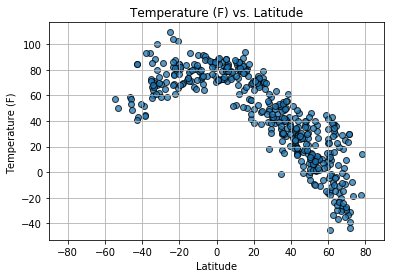

In [64]:
# Save a plot for png images for each scatter plot.

plt.scatter(weather_data["lat"], weather_data["temp"], alpha=.75, edgecolors="k")
plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)
plt.savefig("Temperature_vs_Latitude.png")
plt.show()

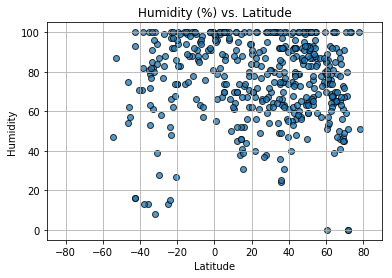

In [65]:
# Humidity (%) vs. Latitude
plt.scatter(weather_data["lat"], weather_data["humidity"], alpha=.75, edgecolors="k")

plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)
plt.savefig("Humidity_vs_Latitude.png")
plt.show()

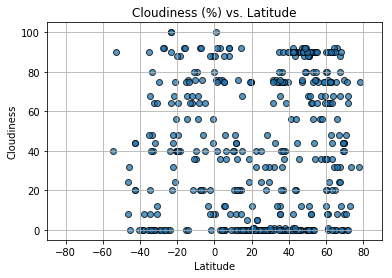

In [66]:
# Cloudiness_vs_Latitude
plt.scatter(weather_data["lat"], weather_data["cloudiness"], alpha=.75, edgecolors="k")

plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)
plt.savefig("Cloudiness_vs_Latitude.png")
plt.show()

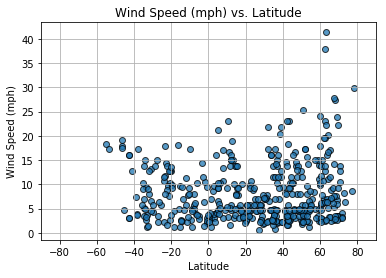

In [67]:
# Wind Speed (mph) vs. Latitude
plt.scatter(weather_data["lat"], weather_data["winds"], alpha=.75, edgecolors="k")

plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)
plt.savefig("WindSpeed_vs_Latitude.png")
plt.show()